### US Visa Prediction

Lifecycle of a Machine Learning Project
- Understanding the problem statement
- Data Collection
- Exploratory data analysis
- Data cleaning
- Data Preprocessing
- Model Training
- Choose the best model 

About

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on working place and maintain requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

# 1) Problem statement


- OFLC gives job certification applications for employers seeking to bring foreign workers into the United States and grants certifications.
- As In last year the count of employees were huge so OFLC needs Machine learning models to shortlist visa applicants based on their previous data.

In this project we are going to use the data given to build a Classification model:
- This model is to check if Visa get approved or not based on the given dataset.
- This can be used to Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the certain criteria which influences the decision.

# 2) Data Collection

- The Dataset is part of Office of Foreign Labor Certification (OFLC)
- The data consists of 25480 Rows and 12 Columns
https://www.kaggle.com/datasets/moro23/easyvisa-dataset

In [45]:
#2.1 Import data and required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from pathlib import Path

warnings.filterwarnings("ignore")



%matplotlib inline

In [5]:
# 2.2 Import CSV data as dataframe
filepath = Path(r'C:\Users\RadhikaMaheshwari\Desktop\Test\MLOPS\Us visa prediction\ml_us_visa_approval\EasyVisa.csv')
df = pd.read_csv(filepath)

In [6]:
# Get the top 5 rows
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [7]:
# Get the shape of the dataset
df.shape

(25480, 12)

In [8]:
# Summary of dataset
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [9]:
# Insigts
# - On an average there are 5667 employees in employer's company. 
# - We can ignore the year of establishment from the above summary as it is meaningless
# - On an average prevailing wage comes out to be $74455.81

In [10]:
# Check the datatypes in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [11]:
# Insights
# - Most of the columns are object data type. 
# - There is only one column called prevailing_wage that is float data type
# - There are only 2 columns that are of int 64 data type namely - no_of_employees and yr_of_estab
# - There are no not null values or missing values in the dataset so there will not be any need to handle missing data.

# 3) Exploratory Data Analysis

In [12]:
# Define the numerical and categorical features
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f'There are {len(numerical_features)} numerical features in the dataset namely {numerical_features}')
print(f'There are {len(categorical_features)} categorical features in the dataset namely {categorical_features}')

There are 3 numerical features in the dataset namely ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
There are 9 categorical features in the dataset namely ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [13]:
# Proportion of the count of data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print('*******************************************************')

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
*******************************************************
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
*******************************************************
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
*******************************************************
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
*******************************************************
requires_job_training
N    88.402669

In [14]:
# Insights
# - case_id have unique values for all the datapoints and hence can be dropped from the dataset as it adds no value to analysis
# - continent column is highly biased towards Asia. therefore we can combine the rest of the categories to form a single category
# - unit_of_wage column has most of the values as yearly contracts.

In [15]:
# Univariate analysis
# The term univariate analysis refers to the analysis of one variable. The purpose of univariate analysis is to understand the
# distribution of values for that particular variable

# Other types of analysis are
# Bivariate analysis - The analysis of two variables to understand relationship between these variables
# Multivariate analysis - The analysis of more than two variables.

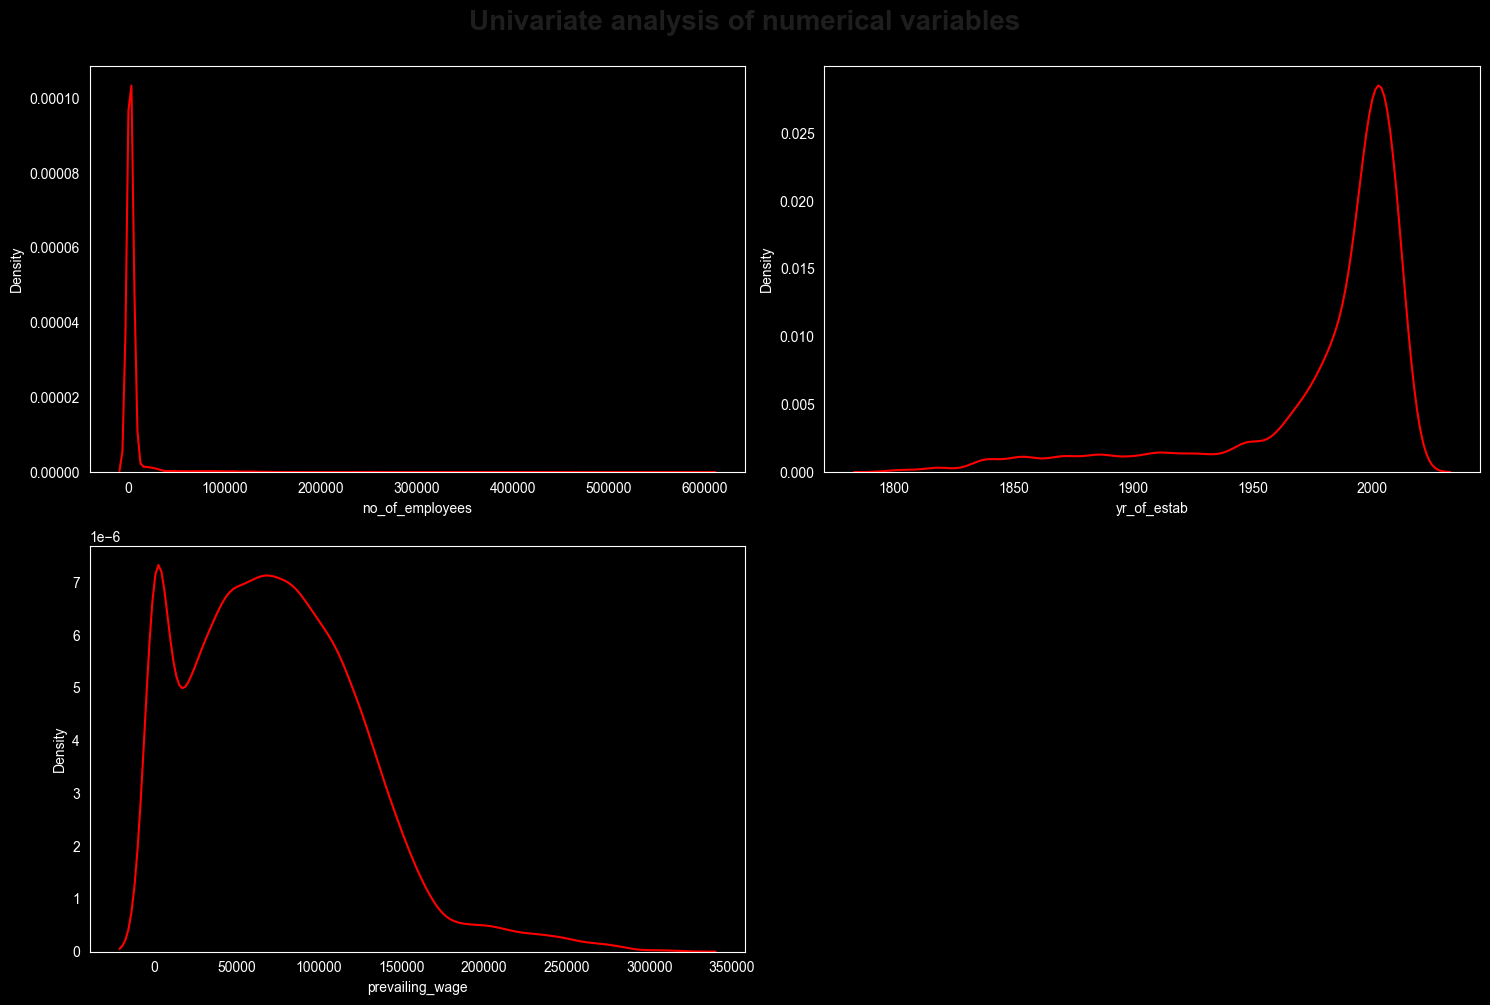

In [46]:
# Numerical features univariate analysis
plt.figure(figsize=(15, 10), facecolor='black')
plt.suptitle('Univariate analysis of numerical variables', fontsize = 20, fontweight = 'bold', alpha = 0.8, y = 1.)

for i in range(len(numerical_features)):
    ax=plt.subplot(2, 2,i+1)
    sns.kdeplot(data=df[numerical_features[i]], color = 'red', )
    plt.xlabel(numerical_features[i])
    plt.tight_layout()
    ax.set_facecolor('black')
    
    # Change the color of the labels and ticks to white
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

In [39]:
# Insights
# Number of employees column is left skewed. This indicates the presence of outliers
# prevailing_wage is a right skewed column.

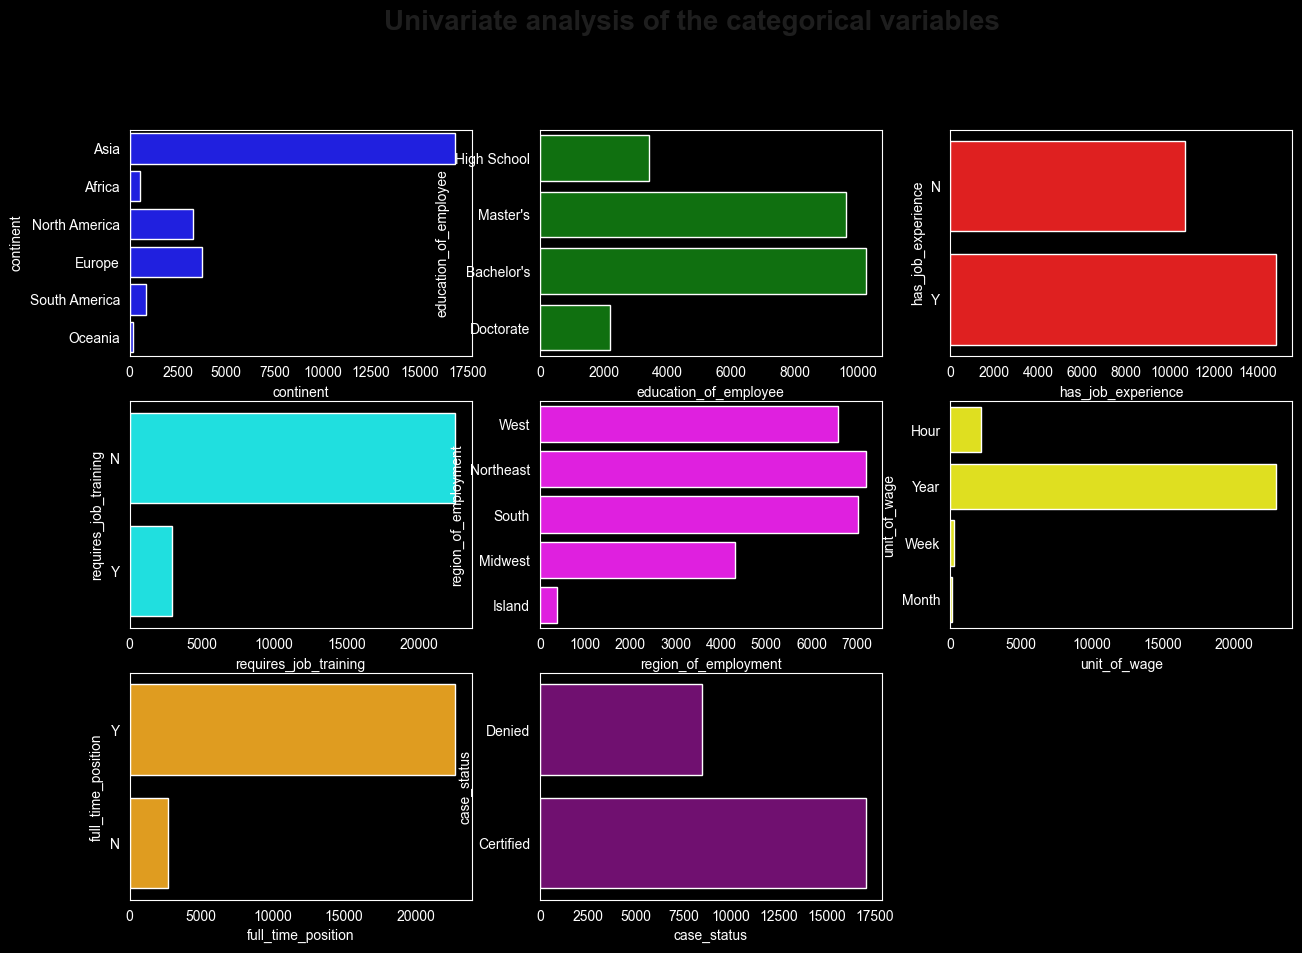

In [48]:
# Categorical features univariate analysis
# removing the case_id column as that is not needed as it only contains unique values
# categorical_features.remove('case_id') # This is a list therefore we are removing one element from the list

plt.figure(figsize=(15, 10), facecolor='black')
plt.suptitle("Univariate analysis of the categorical variables", fontsize = 20, fontweight = 'bold', alpha = 0.8, y = 1.)
color = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'orange', 'purple']
for i in range(0,len(categorical_features)):
    ax = plt.subplot(3, 3, i+1)
    sns.countplot(data = df[categorical_features[i]],color = color[i])
    plt.xlabel(categorical_features[i])
    ax.set_facecolor('black')
    
    # Change the color of the labels and ticks to white
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')


In [49]:
# Insights
# require_job_training, unit_of_wage, full_time_position and continents have one of the categories which is dominating. This
# makes these columns imbalanced datasets
# Rest of the columns have a balance of categories

In [62]:
# Multivariate analysis
# Numerical variables can be of two types - discrete and continuious. Separating these two

discrete_features = [feature for feature in numerical_features if df[feature].nunique() <= 25]

continuous_features = [feature for feature in numerical_features if df[feature].nunique() >25]

print(f'There are {len(discrete_features)} discrete features amongst the numerical features namely {discrete_features}')
print(f'There are {len(continuous_features)} continuous features amongst the categorical features namely {continuous_features}')

There are 0 discrete features amongst the numerical features namely []
There are 3 continuous features amongst the categorical features namely ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


In [78]:
# Check for multicollinearity in numerical features
# Using Variance Inflation Factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['features'] = dataset.columns
    vif['VIF_Value'] = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]
    return vif


calculate_vif(df.loc[:,numerical_features])

,features,VIF_Value
0,no_of_employees,1.061216
1,yr_of_estab,3.054392
2,prevailing_wage,2.987137


In [80]:
# Insights
# None of the VIF Values are greater than 5 for the numerical features. Therefore, there is no multicollinearity between
# numerical features

In [89]:
# Check multicollinearity in categorical variables
# Performing one hot encoding first and then checking VIF

one_hot_encoded_categorical_varianbles = pd.get_dummies(df[categorical_features], drop_first=True, dtype = int)
one_hot_encoded_categorical_varianbles

,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1
2,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
4,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1
25476,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1
25477,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0
25478,1,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,1


In [95]:
df["continent"].unique()

array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
       'Oceania'], dtype=object)